# Read in data files


In [1]:
import os
import pandas as pd
from pathlib import Path
from constants import METADATA_COLS, FEATURE_COLS

# Define the directory path
slidefiles_dir = Path("data/SlideFiles")

# List all files in the directory
csv_files = os.listdir(slidefiles_dir)

raw_df = pd.DataFrame()
for csv_file in csv_files:
    file_path = slidefiles_dir / csv_file
    raw_df = pd.concat([raw_df, pd.read_csv(file_path)])

raw_df = raw_df.sort_values(by=["slide", "well"])
raw_df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X128,X129,X130,type,row,col,well,set,type.f,slide
0,0.058703,0.047442,296.564961,2.814302,5.219064,7.471565,0.176484,59.023471,259.954936,13.851270,...,32.349785,0.001218,0.729399,fit1,1,1,1,1,2,1
1,0.053762,0.039319,310.125153,3.249970,5.567017,8.128290,0.224600,70.349711,254.304048,11.704548,...,34.808786,0.001170,0.726783,fit1,1,1,1,1,2,1
2,0.063482,0.054567,404.721265,2.802875,5.065489,7.240840,0.229282,68.810549,239.147256,9.801566,...,30.347390,0.001360,0.734110,fit1,1,1,1,1,2,1
3,0.061266,0.052233,360.742694,3.117612,5.604749,7.844487,0.155879,68.755236,234.285714,7.991611,...,35.177296,0.001484,0.745590,fit1,1,1,1,1,2,1
4,0.057151,0.047473,328.880636,2.800955,5.359986,7.431968,0.205421,60.054356,267.952962,14.757158,...,35.026132,0.001179,0.724277,fit1,1,1,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,0.053822,0.046119,306.503161,3.012748,5.310461,7.564760,0.123112,48.457954,259.121260,11.451268,...,33.228346,0.001317,0.735016,rfnotDL,16,24,384,11,5,33
2684,0.089609,0.077173,401.472820,1.848404,4.183967,5.041555,0.007575,34.945019,286.450550,6.207773,...,24.395604,0.000444,0.750264,rfnotDL,16,24,384,11,5,33
2685,0.066072,0.061104,311.369252,2.539630,4.979861,5.858461,0.067392,36.395438,288.438548,12.537553,...,33.421788,0.000959,0.763856,rfnotDL,16,24,384,11,5,33
2686,0.062260,0.056566,270.337583,2.710935,5.019602,6.277975,0.059850,43.314613,239.218121,9.537043,...,32.255034,0.000781,0.746646,rfnotDL,16,24,384,11,5,33


# Aggregating the 7 measurements per well


In [2]:
df = raw_df.groupby(["slide", "well"]).agg(
    {
        **{col: "median" for col in FEATURE_COLS},
        **{col: "first" for col in METADATA_COLS if col not in ["well", "slide"]},
    }
)
# Reset index to make set and well regular columns again and re-order columns to match raw_df
df = df.reset_index()
df = df[raw_df.columns.tolist()]
df = df.sort_values(by=["slide", "well"])

df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X128,X129,X130,type,row,col,well,set,type.f,slide
0,0.058703,0.047473,339.405263,2.814302,5.359986,7.471565,0.197044,68.755236,259.954936,11.704548,...,34.215859,0.001218,0.726783,fit1,1,1,1,1,2,1
1,0.052917,0.043114,330.014976,3.580488,6.538862,8.280798,0.163056,54.636078,266.998584,13.234305,...,48.240113,0.001116,0.742736,bscl2,1,2,2,1,1,1
2,0.058053,0.050606,327.795411,3.164617,5.555491,7.671293,0.205977,57.654587,263.994158,11.169138,...,35.385199,0.000733,0.746037,gene,1,3,3,1,3,1
3,0.064786,0.055854,334.971096,2.807814,5.079066,7.056355,0.158037,58.586686,259.338159,10.965109,...,31.543950,0.000881,0.739885,gene,1,4,4,1,3,1
4,0.060893,0.051779,339.042043,3.081632,5.195757,7.603377,0.220992,61.439967,248.020107,12.536984,...,31.701031,0.000901,0.735739,gene,1,5,5,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12667,0.056311,0.045063,330.139954,3.052096,5.749158,8.040765,0.195249,62.881612,254.706849,11.462007,...,38.454626,0.001734,0.724764,gene,16,20,380,11,3,33
12668,0.057311,0.050118,324.400580,2.673068,5.254721,7.461621,0.189065,58.793884,254.503015,10.386516,...,34.116492,0.001467,0.717865,gene,16,21,381,11,3,33
12669,0.056503,0.045482,339.647164,2.940642,5.358274,7.847527,0.175623,63.784170,254.890519,10.358971,...,33.396184,0.001463,0.721053,gene,16,22,382,11,3,33
12670,0.055796,0.046147,333.302406,2.876219,5.679459,7.915096,0.165234,63.206149,259.857143,11.272852,...,37.853896,0.001726,0.716473,rf,16,23,383,11,4,33


# Normalizing Slides


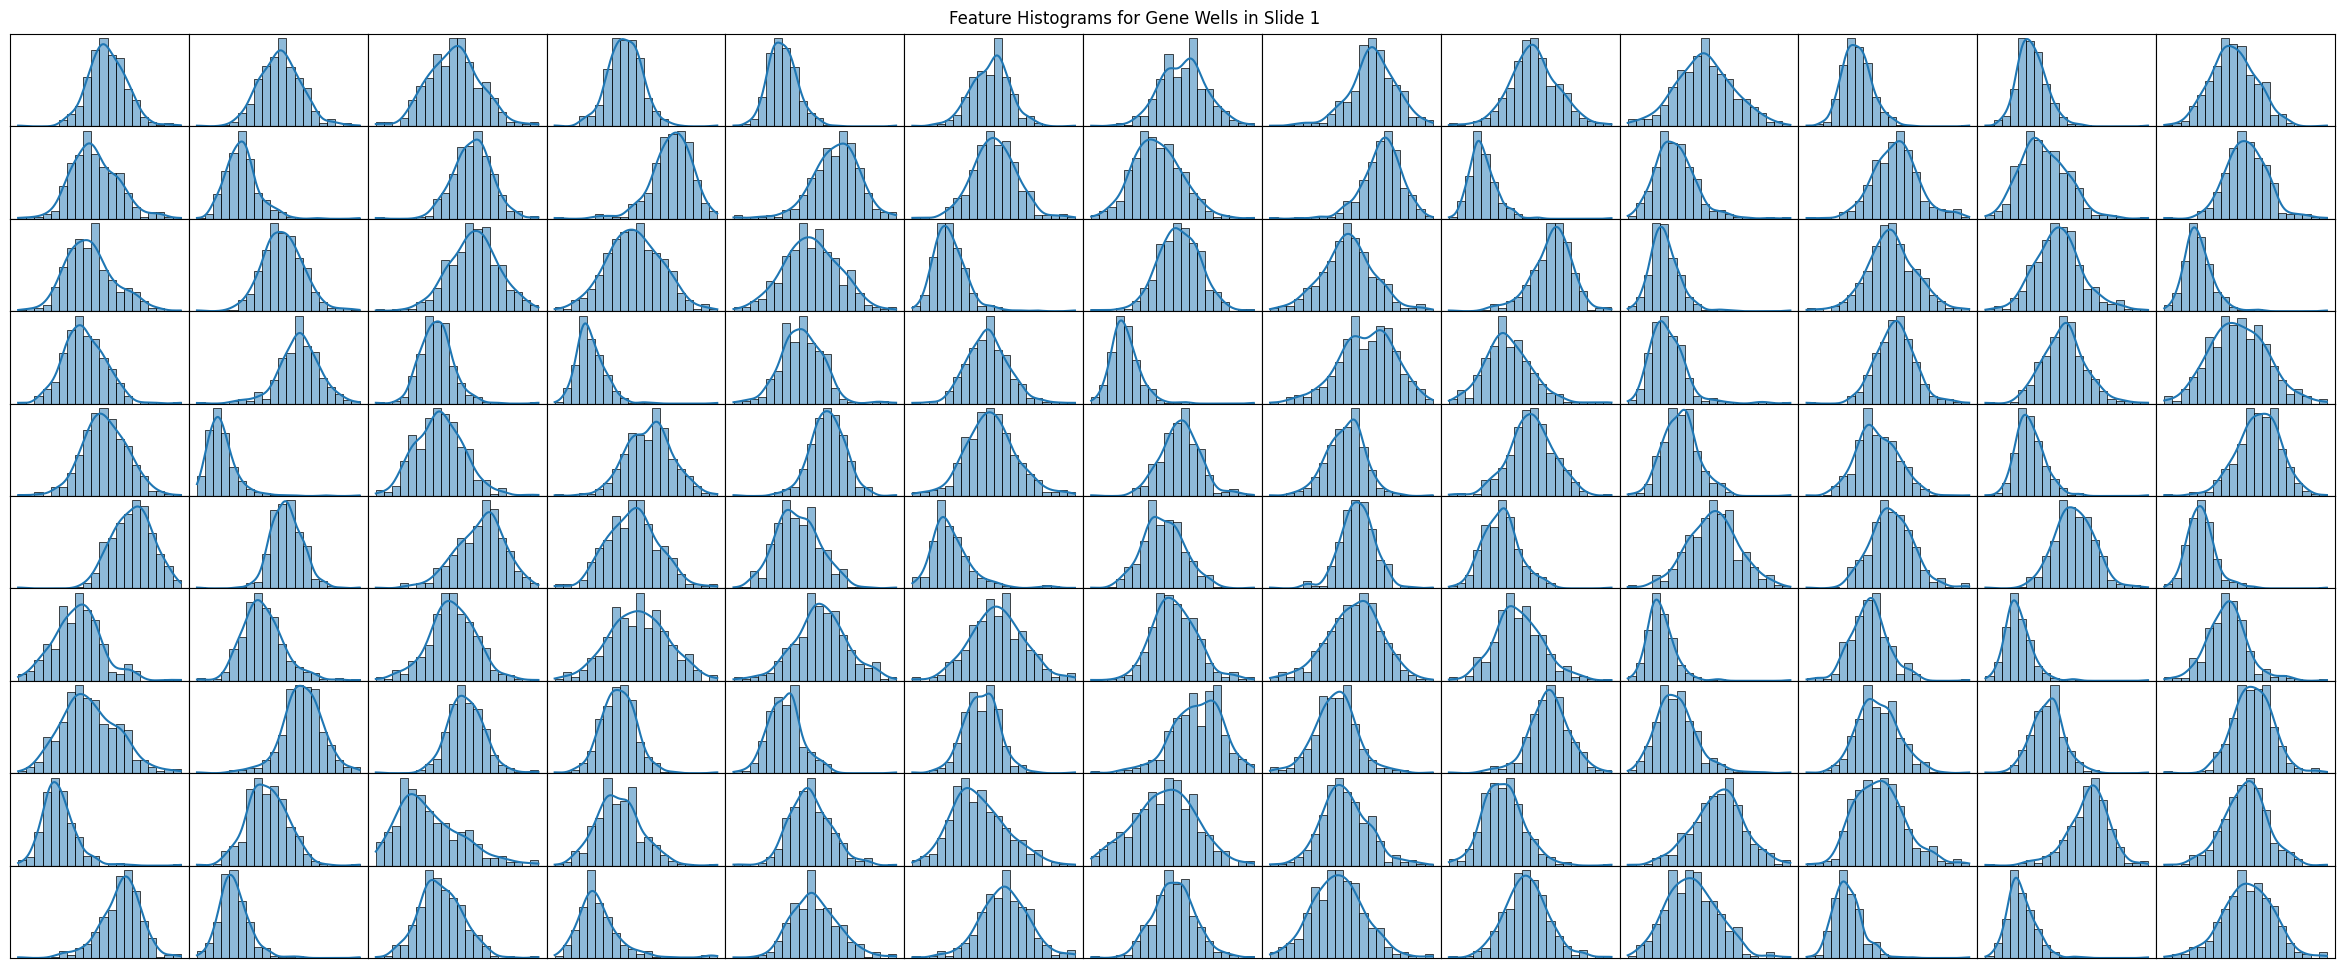

In [3]:
from plotting_utils import plot_feature_histograms


# for slide_number in df["slide"].unique():
#     plot_feature_histograms(
#         df[
#             (df["slide"] == slide_number) & (df["type"] == "gene")
#         ],
#         f"Feature Histograms for Gene Wells in Slide {slide_number}",
#     )

slide_number = 1
plot_feature_histograms(
    df[(df["slide"] == slide_number) & (df["type"] == "gene")],
    f"Feature Histograms for Gene Wells in Slide {slide_number}",
)

In [4]:
# Get unique slide numbers from df
unique_slides = df["slide"].unique()

# Process each slide
for slide_number in unique_slides:
    # Get indices for current slide
    slide_indices = df["slide"] == slide_number

    # Get the gene rows for this slide
    gene_indices = slide_indices & (df["type"] == "gene")

    if gene_indices.any():
        # Calculate mean and standard deviation for feature columns
        gene_means = df.loc[gene_indices, FEATURE_COLS].mean()
        gene_stds = df.loc[gene_indices, FEATURE_COLS].std()

        # Normalize all rows for this slide by subtracting mean and dividing by std
        for feature in FEATURE_COLS:
            df.loc[slide_indices, feature] = (
                df.loc[slide_indices, feature] - gene_means[feature]
            ) / gene_stds[feature]
    else:
        print(f"Warning: No gene rows found for slide {slide_number}")

df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X128,X129,X130,type,row,col,well,set,type.f,slide
0,-0.295187,-0.745489,0.386393,-0.805198,-0.213431,-0.270066,1.613162,2.742790,-0.197203,0.570604,...,-0.128211,1.085016,-1.781778,fit1,1,1,1,1,2,1
1,-1.676787,-1.648971,-0.206972,3.038870,3.741731,1.817535,0.404538,-1.281328,0.396481,2.609798,...,4.214216,0.578128,0.800687,bscl2,1,2,2,1,1,1
2,-0.450315,-0.096369,-0.347225,0.952383,0.442494,0.245178,1.930825,-0.421019,0.143248,-0.143108,...,0.233860,-1.323699,1.335032,gene,1,3,3,1,3,1
3,1.157527,0.991233,0.106202,-0.837748,-1.155923,-1.341193,0.226071,-0.155361,-0.249189,-0.415081,...,-0.955532,-0.587614,0.339156,gene,1,4,4,1,3,1
4,0.227930,0.146737,0.363442,0.536037,-0.764422,0.069975,2.464745,0.657857,-1.203148,1.680257,...,-0.906894,-0.490515,-0.331990,gene,1,5,5,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12667,-0.086834,-0.389390,0.127494,0.121154,0.884493,0.620821,0.450445,0.306122,-0.576050,0.039227,...,1.034151,1.701006,-0.474492,gene,16,20,380,11,3,33
12668,0.196860,0.783170,-0.305704,-1.921221,-1.155119,-0.960911,0.243314,-1.017589,-0.595802,-1.320930,...,-0.638512,0.425499,-1.483644,gene,16,21,381,11,3,33
12669,-0.032463,-0.292129,0.845081,-0.479410,-0.727948,0.093058,-0.206935,0.598393,-0.558252,-1.355765,...,-0.916243,0.408527,-1.017328,gene,16,22,382,11,3,33
12670,-0.232965,-0.137917,0.366190,-0.826552,0.596978,0.277599,-0.554918,0.411215,-0.076975,-0.199994,...,0.802526,1.664439,-1.687311,rf,16,23,383,11,4,33


# Aggregate Across Triplicates


In [5]:
# Group by set and well to aggregate across triplicates
df = df.groupby(["set", "well"]).agg(
    {
        **{col: "median" for col in FEATURE_COLS},
        **{
            col: "first" for col in METADATA_COLS if col not in ["well", "set", "slide"]
        },
    }
)

df = df.reset_index()
columns_to_keep = [col for col in raw_df.columns.tolist() if col != "slide"]
df = df[columns_to_keep]
df = df.sort_values(by=["set", "well"])

# Save to CSV
df.to_csv("data/cleaned_gene_array_data.csv", index=False)

df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X127,X128,X129,X130,type,row,col,well,set,type.f
0,0.028406,0.366509,-0.409095,-0.860267,-1.199625,-0.957421,1.069801,1.955345,0.337789,0.077923,...,0.232675,-0.373978,0.761471,-0.038931,fit1,1,1,1,1,2
1,-1.676787,-1.052529,-0.199561,2.466620,3.211458,1.047448,0.250414,-2.472738,0.507739,1.739547,...,-1.219446,3.589147,0.578128,2.398961,bscl2,1,2,2,1,1
2,0.299722,0.172662,-0.347225,-0.716339,-0.626394,-0.929586,1.347048,-0.421019,-0.189115,-0.143108,...,-1.175065,-0.603218,-2.012574,0.793229,gene,1,3,3,1,3
3,0.337794,0.311708,0.163537,-0.152534,-0.681377,-0.345225,-0.124524,-0.448789,-0.457341,-0.415081,...,0.006033,-0.876915,-0.999876,0.457990,gene,1,4,4,1,3
4,0.299525,0.346085,-0.899016,-0.731644,-1.182621,-0.044624,0.513639,0.128500,0.000759,0.343600,...,-0.271680,-1.492425,-1.609442,0.096242,gene,1,5,5,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219,-0.086834,-0.389390,-0.664103,0.121154,0.884493,0.620821,0.450445,0.870069,0.097326,-0.215136,...,0.248297,1.034151,0.109801,-1.521708,gene,16,20,380,11,3
4220,0.196860,0.733349,-0.305704,-1.420634,-0.254738,-0.599128,-0.888902,0.526654,-0.211608,-0.764044,...,-0.434300,-0.275161,0.425499,-1.322050,gene,16,21,381,11,3
4221,0.075461,-0.213490,0.845081,-0.568241,-0.727948,0.093058,-0.455171,0.598393,0.162431,-1.002004,...,-0.379338,-0.904349,0.408527,-1.017328,gene,16,22,382,11,3
4222,-0.232965,-0.243492,1.629059,-0.444117,0.319438,0.415589,-0.181854,0.959834,-0.991392,-0.199994,...,0.441055,0.329625,1.664439,-1.224852,rf,16,23,383,11,4
